In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# 1. A pretty matrix

In [2]:
# using only [np.ones], np.arrange and np.concatenate as in the assignment,
# there is many ways to do it, this is one of them:
_x = np.arange(1, 6).reshape(5, 1)
X = np.concatenate( [_x**i for i in range(5)], axis=1) # range could be replaced with with np.arange, but that's silly
X

# an alternative without np.concatenate:
# X = np.array( [np.arange(1, 6)**i for i in range(5)] ).T

array([[  1,   1,   1,   1,   1],
       [  1,   2,   4,   8,  16],
       [  1,   3,   9,  27,  81],
       [  1,   4,  16,  64, 256],
       [  1,   5,  25, 125, 625]])

# 2. Linear regression

In [3]:
x = np.arange(1, 11).reshape(10, 1)
print('xᵀ:', x.T)

y = np.array([14, 12, 34, 24, 43, 38, 41, 57, 55, 50]).reshape(10, 1)
print('yᵀ:', y.T)

xᵀ: [[ 1  2  3  4  5  6  7  8  9 10]]
yᵀ: [[14 12 34 24 43 38 41 57 55 50]]


In [4]:
# least squares
# approx. coefficients M = [ theta_0 theta_1 ]ᵀ = (XᵀX)⁻¹ Xᵀ y
# where X := [1 x]
X = np.concatenate((np.ones_like(x), x), axis=1)
XtXinv = la.inv(X.T @ X)
M = XtXinv @ X.T @ y

print(f'Regression coefficients (M):\n{M}')

Regression coefficients (M):
[[10.6       ]
 [ 4.76363636]]


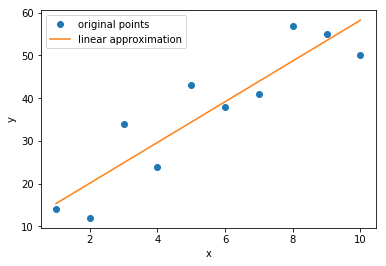

In [5]:
y_approx = X @ M # just two points would be enough for the line, of course...
plt.plot(x, y, 'o')
plt.plot(x, y_approx)
plt.legend(('original points', 'linear approximation'))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 3. Fitting a second order polynomial

In [6]:
# reusing x, y from the previous exercise
X = np.concatenate((np.ones_like(x), x, x**2), axis=1)
XtXinv = la.inv(X.T @ X)
M = XtXinv @ X.T @ y

print(f'Regression coefficients (M):\n{M}')

Regression coefficients (M):
[[ 2.93333333]
 [ 8.5969697 ]
 [-0.34848485]]


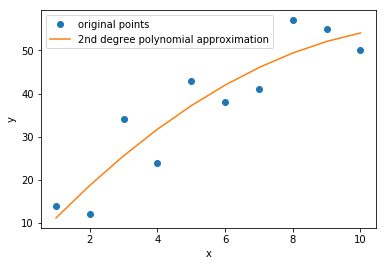

In [7]:
y_approx = X @ M
plt.plot(x, y, 'o')
plt.plot(x, y_approx)
plt.legend(('original points', '2nd degree polynomial approximation'))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 4. Fitting higher degree polynomials

There is only 10 data points, so a 9th order polynomial can already fit the points exactly and no regression is necessary. Approximation/fitting with higher order polynomials would have more than one solution.

Also, this can be seen from our method of approximation, so if matrix $X$ is defined analogically to previous exercises, that is:

$$X = \begin{pmatrix}
     1 &    x_1 &    x_1^2 & \ldots &    x_1^p \\
     1 &    x_2 &    x_2^2 & \ldots &    x_2^p \\
     1 &    x_3 &    x_3^2 & \ldots &    x_3^p \\
\vdots & \vdots &   \vdots & \ddots &   \vdots \\
     1 & x_{10} & x_{10}^2 & \ldots & x_{10}^p
\end{pmatrix}$$

where $x_i$ is the $i-th$ number of vector $x$ and $p$ is the order of the polynomial to which we are fitting.

Size of $X$ is $10×(p+1)$, so if $p \geq 10$ then $rank(X) \leq 10 \Rightarrow rank(X^T X) \leq 10$ but $X^T X$ is a $(p+1)×(p+1)$ matrix, therefore, $X^T X$ must be singular - i.e. it has no inverse.

So let's approximate only up to 9th order polynomial.

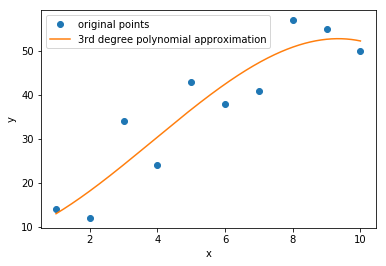

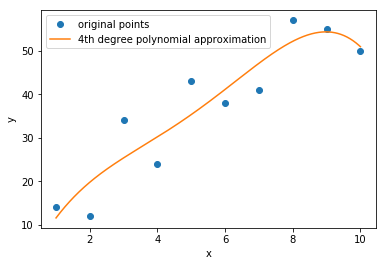

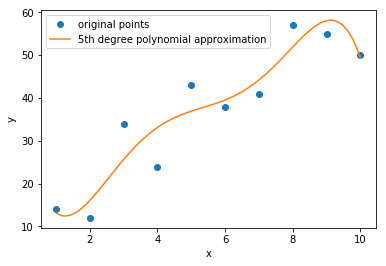

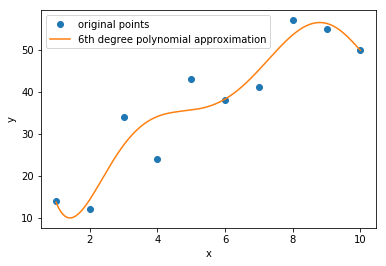

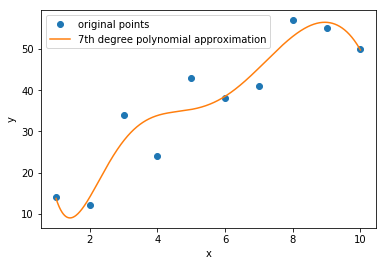

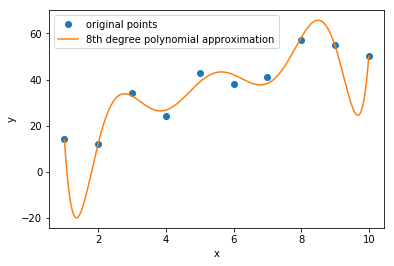

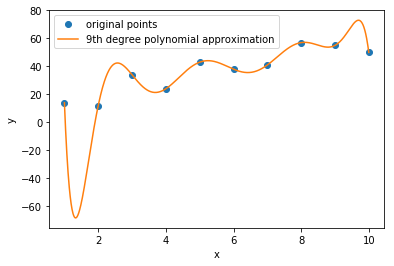

In [8]:
MAX_APPROX_DEGREE = 9

# np.polyfit expects flat arrays
x_flat = x.flatten()
y_flat = y.flatten()

# for smoother graphs
x_plot = np.linspace(1, 10, 1000)

for degree in range(3, MAX_APPROX_DEGREE + 1):
    coef = np.polyfit(x_flat, y_flat, degree)
    y_approx = np.poly1d(coef)(x_plot)
    plt.plot(x, y, 'o')
    plt.plot(x_plot, y_approx)
    degree_label = '3rd' if degree == 3 else f'{degree}th'
    approx_label = degree_label + ' degree polynomial approximation'
    plt.legend(('original points', approx_label))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

So as said, 9th degree polynomial fits the points exactly, however, there are quite strong oscillations already - it's quite useless...

Which approximation would I use? That depends on the nature of the problem, here the linear or quadratic fits looked sensible.